# **VISUALIZATION OF FIBER SHAPES**

---

This notebook helps to better understand the effectiveness of the function used to represent the fibers by visualizing them.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

We can import the model info

In [2]:
angles_func = 'harmlin'
directory = '../dataset/' + angles_func + '/'
model_info = pd.read_csv(directory + 'model_info.csv', sep=",")
sets = [set.lower() for set in ['Train', 'Val', 'Test'] if set in model_info.columns]
# The annoying question of x.value[..] is due to series nature of the dataframe
h = int(model_info['Height'].values)
r = int(model_info['Radius'].values)
mesh_x = int(model_info['MeshSize'].values)
plies = int(model_info['Plies'].values)
eff_plies = int(model_info['EffectivePlies'].values)
symmetric = model_info['Symmetric'].values[0]
balanced = model_info['Balanced'].values[0]
train_smp = int(model_info['Train'].values)

if angles_func == 'harmlin':
    col_name = ['Amplitude', 'PhaseShift', 'Omega', 'Beta']

We have to create the folder to store the plot. Just the shape of the fibers for the training set will be generated.

In [3]:
try:
    if not os.path.isdir(directory + 'train_shape'):
        os.makedirs(directory + 'train_shape')
except OSError:
    print('Error: Creating directory. ' + directory + 'train_shape')

Now we have to create a container for the parameters of each ply which must be easily accessible.

In [4]:
params_dict = {}
if angles_func == 'harmlin':
    file_name = 'ply'
elif angles_func == 'linear':
    file_name = 'theta'
for ply in range(1, eff_plies+1):
    ply_param = pd.read_csv(directory + 'train/' + file_name + str(ply) + '.csv', sep=",", skiprows=0)
    params_dict.update({'ply'+str(ply): ply_param})

We have to iterate over each sample and for each sample we have to iterate over all the free plies.

In [5]:
tht = params_dict['ply1'].iloc[0].values
tht

array([65.08, 20.6 ,  0.39, 38.52])

In [6]:
deg2rad = np.pi / 180

if angles_func == 'harmlin':
    x = np.linspace(mesh_x / 2, h - mesh_x / 2, 1000)
    for smp in range(0, train_smp):
        legend = []
        for ply in range(1, eff_plies+1):
            amplitude = params_dict['ply' + str(ply)]['Amplitude'][smp]
            phase_shift = params_dict['ply' + str(ply)]['PhaseShift'][smp] * deg2rad
            omega = params_dict['ply' + str(ply)]['Omega'][smp]
            beta = params_dict['ply' + str(ply)]['Beta'][smp] * deg2rad 

            y = amplitude * (np.sin(omega * (2 * np.pi / h) * x + phase_shift)) + x * np.tan(beta)

            plt.figure(smp)
            plt.title('Fiber')
            plt.plot(x, y)
            plt.xlim([0, 750])
            plt.ylim([-750, 750])
            legend = np.append(legend, 'ply' + str(ply))
        plt.legend(legend)  
        plt.savefig(directory + 'train_shape/sample' + str(smp) + '.png')
        plt.close()
        
elif angles_func == 'linear':
    x_elems = int(h / mesh_x)
    x = np.linspace(0, h, x_elems)
    for smp in range(0, train_smp):
        legend = []
        for ply in range(1, eff_plies+1):
            tht = params_dict['ply' + str(ply)].iloc[smp].values
            y = np.array([np.tan(tht[i]*deg2rad)*mesh_x for i in range(len(tht))])
            yy = np.zeros(len(y))
            for i in range(len(y) - 1):
                yy[i + 1] = yy[i] + y[i + 1]
                
            plt.figure(smp)
            plt.title('Fiber')
            plt.plot(x, yy)
            plt.xlim([0, 750])
#             plt.ylim([-750, 750])
            legend = np.append(legend, 'ply' + str(ply))
        plt.legend(legend)  
        plt.savefig(directory + 'train_shape/sample' + str(smp) + '.png')
        plt.close()

In [7]:
h = 700 # height
r = 300  # radius
mesh_size = 10  # mesh size
x_elems= int(h / mesh_size)
x = np.linspace(0, h, x_elems)
deg2rad = np.pi / 180
k_max = 1 / 635

pieces = 2
T = [0, 1, 10]

mid = int(np.ceil(len(x)/pieces))
top = int(np.floor(len(x)/pieces                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ))
if mid == top:
    mid += 1
x1 = np.linspace(0,h/2,mid)
x2 = np.linspace(0,h/2 - mesh_size,top)

tht_1 = 0 + T[0] + (T[1] - T[0]) * x1 / x1[-1]
tht_2 = 0 + T[1] + (T[2] - T[1]) * x2 / x2[-1]
k1 = (T[1] - T[0]) * deg2rad / x1[-1] * np.cos(tht_1 * deg2rad)
k2 = (T[2] - T[1]) * deg2rad / x2[-1] * np.cos(tht_2 * deg2rad)
tht = np.concatenate([tht_1[0:-1], tht_2])

y = np.array([np.tan(tht[i]*deg2rad)*mesh_size for i in range(len(tht))])
yy = np.zeros(len(y))
for i in range(len(y) - 1):
    yy[i + 1] = yy[i] + y[i + 1]

In [8]:
pieces = 2
T = [0, -100.45, -50]
print(T)
print(T[1])
pieces_length = [np.ceil(len(x)/pieces)]
for piece in range(pieces-1):
    pieces_length.append(np.floor(len(x)/pieces))
if pieces_length[0] == pieces_length[1]:
    pieces_length[0] += 1

x_tmp = np.linspace(0,h/pieces,int(pieces_length[0]))
tht_tmp = 0 + T[0] + (T[1] - T[0]) * x_tmp / x_tmp[-1]
k_tmp = (T[1] - T[0]) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)

max_k = np.max(k_tmp)
min_k= np.min(k_tmp)
if max_k >= abs(min_k):
    maxim = max_k
    flag_pos = True
else:
    maxim = abs(min_k)
    flag_pos = False

if maxim > k_max and flag_pos:
    iterate = True
    while iterate:
        T[1] -= 1
        tht_tmp = 0 + T[0] + (T[1] - T[0]) * x_tmp / x_tmp[-1]
        k_tmp = (T[1] - T[0]) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)
        max_k = np.max(k_tmp)
        if max_k < k_max:
            iterate = False
elif maxim > k_max and not flag_pos:
    iterate = True
    while iterate:
        T[1] += 1
        tht_tmp = 0 + T[0] + (T[1] - T[0]) * x_tmp / x_tmp[-1]
        k_tmp = (T[1] - T[0]) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)
        max_k = abs(np.min(k_tmp))
        if max_k < k_max:
            iterate = False
            
tht = tht_tmp[0:-1]

for i in range(1,pieces):
    x_tmp = np.linspace(0,h/pieces,int(pieces_length[i]))
    tht_tmp = 0 + T[i] + (T[i+1] - T[i]) * x_tmp / x_tmp[-1]
    k_tmp = (T[i+1] - T[i]) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)

    max_k = np.max(k_tmp)
    min_k= np.min(k_tmp)
    if max_k >= abs(min_k):
        maxim = max_k
        flag_pos = True
    else:
        maxim = abs(min_k)
        flag_pos = False

    if maxim > k_max and flag_pos:
        iterate = True
        while iterate:
            T[i+1] -= 1
            tht_tmp = 0 + T[i] + (T[i+1] - T[i]) * x_tmp / x_tmp[-1]
            k_tmp = (T[i+1] - T[i]) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)
            max_k = np.max(k_tmp)
            if max_k < k_max:
                iterate = False
    elif maxim > k_max and not flag_pos:
        iterate = True
        while iterate:
            T[i+1] += 1
            tht_tmp = 0 + T[i] + (T[i+1] - T[i]) * x_tmp / x_tmp[-1]
            k_tmp = (T[i+1] - T[i]) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)
            max_k = abs(np.min(k_tmp))
            if max_k < k_max:
                iterate = False
    tht = np.concatenate([tht, tht_tmp])
print(T)

# tht = np.concatenate([tht_1[0:-1], tht_2])

# y = np.array([np.tan(tht[i]*deg2rad)*mesh_size for i in range(len(tht))])
# yy = np.zeros(len(y))
# for i in range(len(y) - 1):
#     yy[i + 1] = yy[i] + y[i + 1]

[0, -100.45, -50]
-100.45
[0, -31.450000000000003, -50]


In [9]:
len(tht)

70

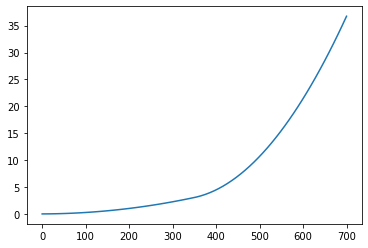

In [10]:
plt.plot(x, yy)

In [11]:
# from scipy.optimize import fsolve
# def T_max(height, l_tmp, mesh_size, T0, T1, k_max):
#     x_tmp = np.linspace(0,height/2,l_tmp)
#     tht_tmp = 0 + T0 + (T1 - T0) * x_tmp / x_tmp[-1]
#     k_tmp = (T1 - T0) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)
    
#     max_value = np.amax(abs(k_tmp))
#     max_pos = np.where(abs(k_tmp) == max_value)

#     if max_value > k_max:
#         def curvature(T_hat):
#             tht_foo = 0 + T0 + (T_hat - T0) * x_tmp / x_tmp[-1]
#             k_foo = (T_hat - T0) * deg2rad / x_tmp[-1] * np.cos(tht_tmp * deg2rad)
#             max_value = np.amax(abs(k_foo))
#             max_pos = np.where(abs(k_foo) == max_value)
#             phi = T0 + (T_hat - T0) * x_tmp[max_pos] / x_tmp[-1]
#             kappa = (T_hat - T0) * deg2rad / x_tmp[-1] * np.cos(phi * deg2rad)
#             return k_max - kappa

#         new_T = fsolve(curvature, T1)
#     else:
#         new_T = T1
    
#     return new_T
        
# new_t = T_max(h, mid, mesh_size, T[0], T[1], k_max)